In [1]:
import tensorflow 
print("Tensorflow Version: ", tensorflow.__version__)
print("Cuda Availability : ", tensorflow.test.is_built_with_cuda())
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

/Users/cmcneile/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/cmcneile/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/cmcneile/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/cmcneile/ana

Tensorflow Version:  1.14.0
Cuda Availability :  False
Num GPUs Available:  0


/Users/cmcneile/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/cmcneile/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/cmcneile/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import skimage.io
import tqdm
import os

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, ZeroPadding2D, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/cmcneile/anaconda3/envs/r-tensorflow/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### IMPORTING / VIEWING / PRE-PROCESSING DATASET

In [3]:
# Importing Dataset 

cancerous      = os.listdir('brain_tumor_dataset/yes')
non_cancerous  = os.listdir('brain_tumor_dataset/no') 

In [4]:
len(cancerous), len(non_cancerous)

(155, 98)

# Viewing Dataset - Cancerous 

100%|██████████| 5/5 [00:00<00:00, 22.88it/s]


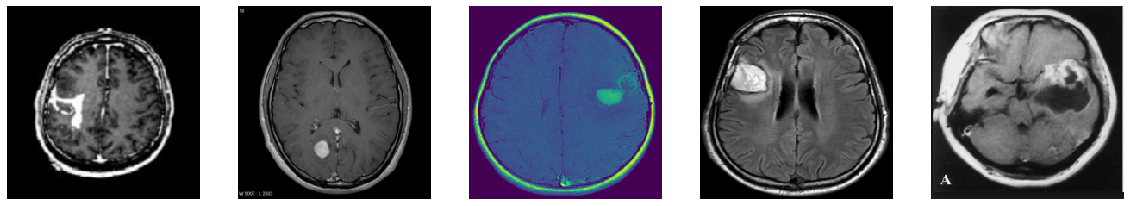

In [5]:


fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(cancerous))
    img  = imread('brain_tumor_dataset/yes/' + cancerous[rand])
    img  = resize(img, (224,224))
    ax[i].imshow(img)
    ax[i].axis('off')

# Viewing Dataset - Non-Cancerous 

100%|██████████| 5/5 [00:00<00:00, 29.35it/s]


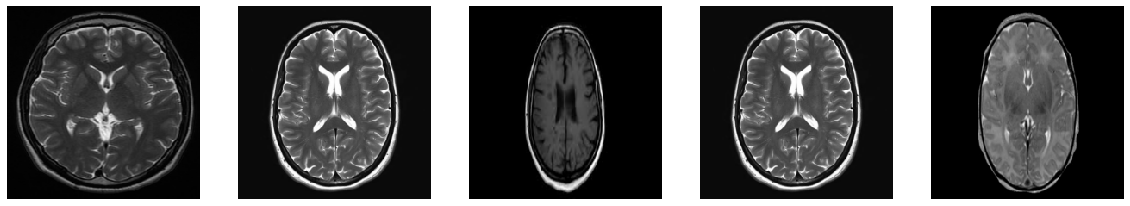

In [28]:


fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(non_cancerous))
    img  = imread('brain_tumor_dataset/no/' + non_cancerous[rand])
    img  = resize(img, (224,224))
    ax[i].imshow(img)
    ax[i].axis('off')

In [7]:
# Converting images into proper shape and storing tehm as asn array.

Image = []
Label = []

for i in tqdm(range(0, len(cancerous))):
    img = imread('brain_tumor_dataset/yes/' + cancerous[i])
    img = resize(img, (224, 224, 3))
    Image.append(img)
    Label.append(1)
    
for i in tqdm(range(0, len(non_cancerous))):
    img = imread('brain_tumor_dataset/no/' + non_cancerous[i])
    img = resize(img, (224, 224, 3))
    Image.append(img)
    Label.append(0)
    
Image = np.array(Image)
Label = np.array(Label) 

100%|██████████| 98/98 [00:02<00:00, 38.22it/s]


In [8]:
# Normalizing - As such not required 

Image.min(), Image.max()

(0.0, 1.0)

In [9]:
# Shuffle the data as results are appened.

Image, Label = shuffle(Image, Label, random_state = 42)

100%|██████████| 5/5 [00:00<00:00, 522.73it/s]


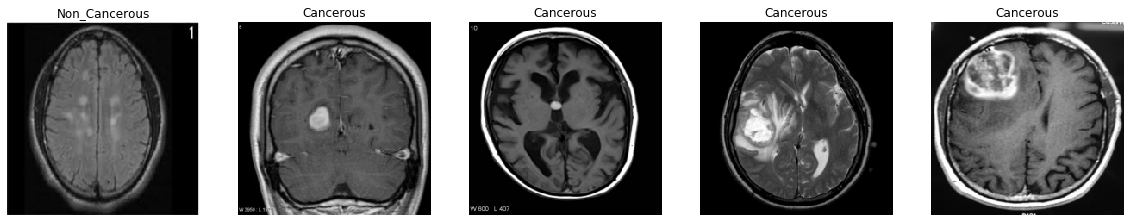

In [10]:
# Viewing Image - After Shuffle 

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(Image))
    ax[i].imshow(Image[rand])
    ax[i].axis('off')
    a = Label[rand]
    if a == 1:
        ax[i].set_title('Cancerous')
    else:
        ax[i].set_title('Non_Cancerous')

In [11]:
# Assigning Images and Label to new variable 

X = Image
y = Label

In [12]:
# Splitting Data - Training & Validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
# Checking Shape 

X_train.shape, X_val.shape

((177, 224, 224, 3), (76, 224, 224, 3))

### DATA AUGMENTATION

In [14]:
# Creating augmentation object

train_datagen  = ImageDataGenerator(rescale = 1./255,
                                    width_shift_range = 0.05,
                                    height_shift_range = 0.05,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    rotation_range = 30,
                                    fill_mode = 'nearest',
                                    zoom_range = 0.2,
                                    shear_range = 0.2)

# Fitting to train data 
train_datagen.fit(X_train)

### MODEL BUILDING

> `MODEL INITIALIATION`

In [15]:
model = Sequential()

> `BUILDING LAYERS`

In [16]:
# Input Layer 
model.add(InputLayer(input_shape = (224,224,3)))


# Adding Zero Padding
model.add(ZeroPadding2D((2,2), data_format = 'channels_last'))


# Adding Layers
model.add(Conv2D(filters = 32,  kernel_size  = (3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,  kernel_size  = (3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.25))


# Adding Flatten
model.add(Flatten())


# Adding Dense-FCC
model.add(Dense(units = 128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Adding Output 
model.add(Dense(units = 1, activation = 'sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


> `MODEL SUMMARY`

In [17]:
# Checking Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 113, 113, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 113, 113, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 64)        2

> `MODEL COMPILE`

In [18]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


> `DEFINING CALLBACKS`

In [19]:
filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 15)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

> `MODEL RUN`

In [23]:
history = model.fit(train_datagen.flow(X_train, y_train, batch_size = 32),
          validation_data = (X_val, y_val),
          epochs = 10,
          verbose = 1,
          callbacks = callback_list)

Epoch 1/10
6/6 [==============================] - 4s 703ms/step - loss: 0.7623 - acc: 0.5932 - val_loss: 0.6390 - val_acc: 0.6316
Epoch 2/10
6/6 [==============================] - 4s 704ms/step - loss: 0.7740 - acc: 0.6441 - val_loss: 0.6333 - val_acc: 0.6447
Epoch 3/10
6/6 [==============================] - 4s 592ms/step - loss: 0.8618 - acc: 0.5819 - val_loss: 0.6300 - val_acc: 0.6316
Epoch 4/10
6/6 [==============================] - 4s 658ms/step - loss: 0.7916 - acc: 0.5480 - val_loss: 0.6222 - val_acc: 0.6447
Epoch 5/10
6/6 [==============================] - 4s 732ms/step - loss: 0.7400 - acc: 0.6328 - val_loss: 0.6153 - val_acc: 0.6447
Epoch 6/10
6/6 [==============================] - 4s 670ms/step - loss: 0.9011 - acc: 0.5763 - val_loss: 0.6120 - val_acc: 0.6447
Epoch 7/10
6/6 [==============================] - 4s 712ms/step - loss: 0.7792 - acc: 0.6328 - val_loss: 0.5991 - val_acc: 0.6447
Epoch 8/10
6/6 [==============================] - 4s 632ms/step - loss: 0.7399 - acc: 0.61

Cancerous Cell


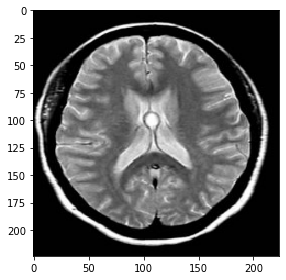

In [24]:
# Model Prediction

image = imread('brain_tumor_dataset/yes/Y117.JPG')
image = resize(image, (224,224,3))
imshow(image)
image = np.expand_dims(image, 0)

prediction  = model.predict_classes(image)

if prediction[0][0] == 1:
    print("Cancerous Cell")
else:
    print("Non-Cancerous Cell")

# Plot the accuracy
Source  https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


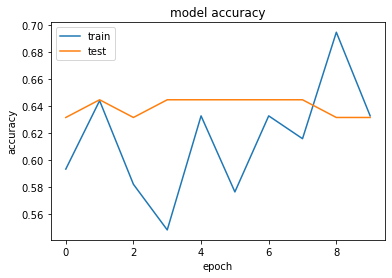

In [27]:
import matplotlib.pyplot as plt
import numpy

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()